In [30]:
#basics
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)
import time
import random
import os

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.decomposition import PCA,KernelPCA,TruncatedSVD
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE,Isomap,LocallyLinearEmbedding
from sklearn.cluster import KMeans,MiniBatchKMeans,AgglomerativeClustering,\
DBSCAN,FeatureAgglomeration
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import *

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense

# Load back data

In [2]:
rest_final = pd.read_csv("./dataset/yelp_business_cleaned.csv")
rest_final.shape

(12658, 73)

In [3]:
business_info = pd.read_csv("./dataset/business_info.csv")
business_info.shape

(12658, 5)

In [4]:
rest_final.head(2)

,latitude,longitude,stars,review_count,is_open,American (New),American (Traditional),Bars,Breakfast & Brunch,Burgers,Cafes,Coffee & Tea,Event Planning & Services,Fast Food,Food Trucks,Mexican,Nightlife,Pizza,Sandwiches,Seafood,RestaurantsTakeOut,GoodForKids,BikeParking,OutdoorSeating,Caters,RestaurantsReservations,RestaurantsDelivery,HasTV,RestaurantsGoodForGroups,BusinessAcceptsCreditCards,NoiseLevel,RestaurantsPriceRange2,garage,street,validated,lot,valet,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,casual,dessert,latenight,lunch,dinner,brunch,breakfast,open_days,open_hours,city_Atlanta,city_Austin,city_Orlando,city_Portland,city_Vancouver,state_ABE,state_BC,state_FL,state_GA,state_MN,state_OR,state_TX,state_WA,RestaurantsAttire_None,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,WiFi_0,WiFi_1,WiFi_None,Alcohol_0,Alcohol_1,Alcohol_None
0,45.588906,-122.593331,4.0,126,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0,0,1,0,0,0,0,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,7,90.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1,49.251342,-123.101333,3.5,169,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,1,1,0,1,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,7,28.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [35]:
rest_final.columns

Index(['latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'American (New)', 'American (Traditional)', 'Bars',
       'Breakfast & Brunch', 'Burgers', 'Cafes', 'Coffee & Tea',
       'Event Planning & Services', 'Fast Food', 'Food Trucks', 'Mexican',
       'Nightlife', 'Pizza', 'Sandwiches', 'Seafood', 'RestaurantsTakeOut',
       'GoodForKids', 'BikeParking', 'OutdoorSeating', 'Caters',
       'RestaurantsReservations', 'RestaurantsDelivery', 'HasTV',
       'RestaurantsGoodForGroups', 'BusinessAcceptsCreditCards', 'NoiseLevel',
       'RestaurantsPriceRange2', 'WiFi', 'Alcohol', 'garage', 'street',
       'validated', 'lot', 'valet', 'romantic', 'intimate', 'touristy',
       'hipster', 'divey', 'classy', 'trendy', 'upscale', 'casual', 'dessert',
       'latenight', 'lunch', 'dinner', 'brunch', 'breakfast', 'open_days',
       'open_hours', 'city_Atlanta', 'city_Austin', 'city_Orlando',
       'city_Portland', 'city_Vancouver', 'state_ABE', 'state_BC', 'state_FL',
  

In [5]:
business_info.head(2)

,business_id,name,city,state,categories
0,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,Portland,OR,"Salad, Soup, Sandwiches, Delis, Restaurants, Cafes, Vegetarian"
1,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,Vancouver,BC,"Restaurants, Thai"


# Clustering

## Visualization before clustering

In [83]:
pwd

'D:\\Uchicago_grad\\2Data Mining\\project'

In [4]:
# utility function for saving image
# Leaf directory
directory = "images"
 
# Parent Directories
parent_dir = "D:/Uchicago_grad/2Data Mining/project"

# Path
IMAGES_PATH = os.path.join(parent_dir, directory)

os.makedirs(IMAGES_PATH, exist_ok=True)

In [5]:
# utility function for image saving
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print(f"{fig_id} Saved")

### TSNE

In [7]:
%%time
tsne = TSNE(perplexity=30,learning_rate=300) #perplexity:50->30 LR也减小500->300
X_tsne = tsne.fit_transform(rest_final)
X_tsne = (X_tsne - X_tsne.min())/(X_tsne.max() - X_tsne.min())

Wall time: 54.1 s


In [6]:
cities = business_info.city.unique()
cities

array(['Portland', 'Vancouver', 'Orlando', 'Austin', 'Atlanta'],
      dtype=object)

In [24]:
# xkcd_rgb dictionary:color names from the xkcd color survey
colors = [sns.xkcd_rgb["goldenrod"], sns.xkcd_rgb["salmon"], sns.xkcd_rgb["pale red"],
      sns.xkcd_rgb["brownish orange"],sns.xkcd_rgb["light orange"]]

TSNE Saved


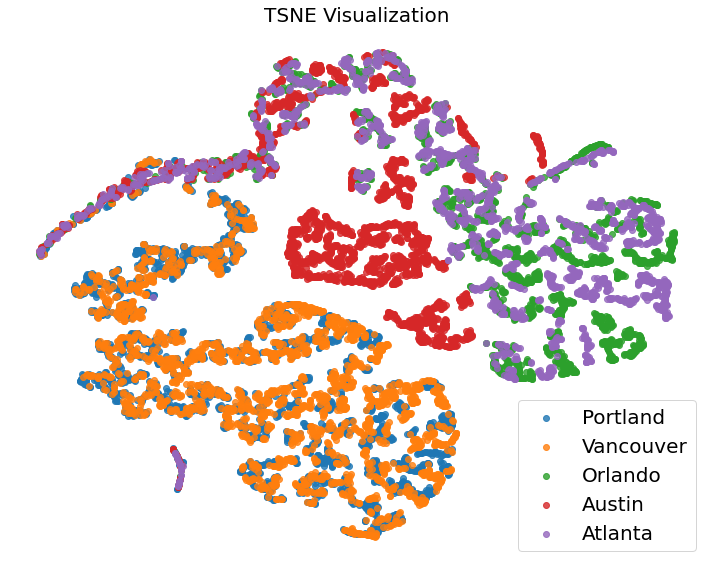

In [12]:
plt.figure(figsize=(10,8))
for i,c in enumerate(cities):
    plt.scatter(X_tsne[business_info["city"] == c,0],
               X_tsne[business_info["city"] == c,1],
                alpha=0.8,
                label = c)
plt.axis("off")
plt.title("TSNE Visualization",fontdict = {"fontsize":20})
plt.legend(fontsize=20)
save_fig("TSNE")
plt.show()

### PCA

PCA Saved


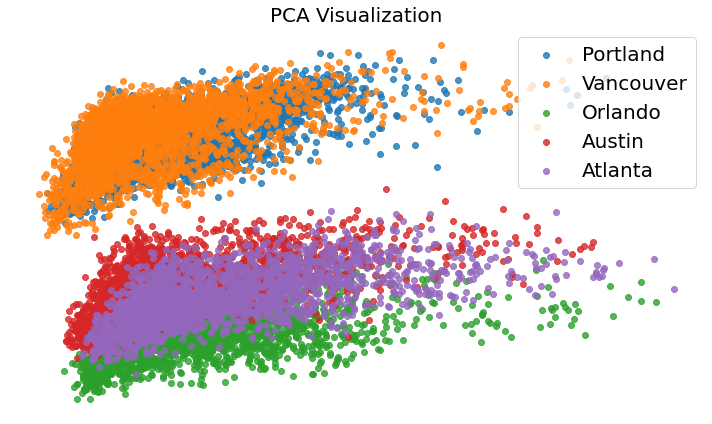

In [14]:
std = StandardScaler().fit_transform(rest_final)
reduced_data = PCA(n_components=2).fit_transform(std)

plt.figure(figsize=(10,6))
for i,c in enumerate(cities):
    plt.scatter(reduced_data[business_info["city"] == c,0],
                reduced_data[business_info["city"] == c,1],
                label=c,
                alpha=0.8)
plt.axis("off")
plt.legend(fontsize=20)
plt.title("PCA Visualization",fontdict = {"fontsize":20})
save_fig("PCA")
plt.show()

## Dimension reduction
- since it is unsupervised algorithms:attach a supervised regression model after it-->evaluate each dim reduction alg by performance metrics given by downstream reg model

### Variable Selection

In [22]:
#drop "is_open" coln since it is all 1
rest_final = rest_final.drop("is_open",axis=1)

heatmap Saved


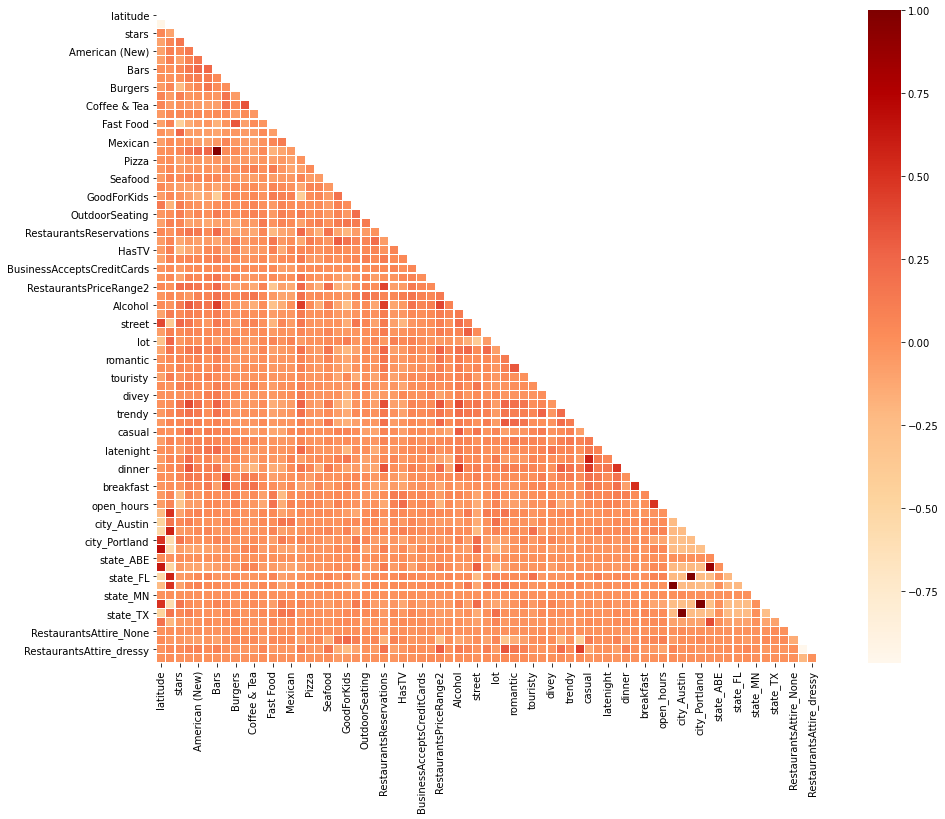

In [7]:
plt.figure(figsize=(15,12))
rcorr = rest_final.corr()
mask = np.zeros_like(rcorr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(rcorr,mask=mask,cmap="OrRd",linewidths=0.2)
save_fig("heatmap",tight_layout=False)
plt.show()

In [12]:
# extract high corr
names = rest_final.columns
rcorr_arr = rcorr.to_numpy()
rows,cols = np.triu_indices_from(rcorr,k=1)
arrays = [np.array([names[r] for r in rows]),
          np.array([names[c] for c in cols])] #multi-index
corrs = list()
for i,j in zip(rows,cols):
    corrs.append(rcorr_arr[i,j])

In [18]:
result_df = pd.DataFrame(corrs,index=arrays)
result_df = result_df.rename(columns = {0:"corr"})
result_df.loc[result_df["corr"]>0.8,:]

,,corr
Bars,Nightlife,0.976640
city_Atlanta,state_GA,1.000000
city_Austin,state_TX,0.999759
city_Orlando,state_FL,1.000000
city_Portland,state_OR,0.999773
city_Vancouver,state_BC,0.887020


In [23]:
# city is more important,delete state
rest_final = rest_final.drop(['state_BC',
 'state_FL',
 'state_GA',
 'state_OR',
 'state_TX'],axis=1)

In [45]:
rest_final[["Bars","Nightlife"]].var()

Bars         0.158174
Nightlife    0.162713
dtype: float64

Almost all highly correlated pairs of features are among city & state, which make sense. Delete `Bars` since its variance is slightly smaller than `Nightlife`

In [24]:
rest_final = rest_final.drop("Bars",axis=1)

PCA & Manifold learning needs standardize first
- Make sure the **same scale is used over all features. Because manifold learning methods are based on a nearest-neighbor search**, the algorithm may perform poorly otherwise

In [48]:
y = rest_final["stars"]
X = rest_final.drop("stars",axis=1)

In [49]:
X_std = StandardScaler().fit_transform(X)

### PCA

In [25]:
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_std)

In [19]:
pca.n_components_ #need to keep 46 PCs for 90% variance

49

In [26]:
X_pca_inv = pca.inverse_transform(X_pca)
mean_squared_error(X, X_pca_inv)

1944.2236058498463

### Kernel PCA

In [27]:
%%time
rbf_pca = KernelPCA(n_components = 20, kernel="rbf", eigen_solver = "auto",gamma=0.04,fit_inverse_transform =True)
X_kpca = rbf_pca.fit_transform(X) #X_transformed_fit_ give the same result


Wall time: 4min 55s


In [28]:
X_kpca_inv = rbf_pca.inverse_transform(X_kpca)
mean_squared_error(X, X_kpca_inv) #much smaller

#much smaller reconstruction error!
#So choose KernelPCA

3.72955395832243e-23

- Manifold Learning:
The reconstruction error computed by each routine can be used to choose the optimal output dimension. For a `d-dimensional manifold` embedded in a `D-dimensional` parameter space, the reconstruction error will decrease as n_components is increased until `n_components == d`.

### Isomap
- Isomap can be viewed as an extension of Multi-dimensional Scaling (MDS) or Kernel PCA. Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points(`shortest path in a neighborhood graph` connecting each observation to its K‐nearest neighbors)

In [ ]:
# intend to find optimal output dimension using recon error
# and then use that output to retrain the model
# but the loop takes too much time
# not run in the end

errs = list()
for num in range(30,51): #dim:2--50 find optimal output dimension using recon error
    iso = Isomap(n_components=num)
    iso.fit(X)
    errs.append(iso.reconstruction_error())

In [ ]:
pd.DataFrame(errs).plot("bo")
plt.xticks(range(2,51))
plt.show()

In [29]:
%%time
# randomly choose some number for n_components
iso = Isomap(n_components=10)
X_iso = iso.fit_transform(X_std)
iso.reconstruction_error()

Wall time: 4min 39s


148.02377719218947

### LLE
- Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which `preserves distances within local neighborhoods`. It can be thought of as a `series of local PCA` which are globally compared to find the best non-linear embedding.
- learn manifolds close to the data and project them onto them. For each item, it looks for the K‐nearest neighbours and produces a set of weights for its approximation. This optimization is performed simultaneously for all items. Once the weights have been determined, it looks for points of lower dimension. The new points are reconstructed from its neighbours in the same way (with the same weights) as the items they represent 

In [ ]:
# intend to find optimal output dimension using recon error
# and then use that output to retrain the model
# but the loop takes too much time
# not run in the enderrs = list()

for n in range(2,51):
    lle = LocallyLinearEmbedding(n_components=n)
    lle.fit_transform(X)
    errs.append(lle.reconstruction_error_)
    

In [ ]:
pd.DataFrame(errs).plot("bo")
plt.xticks(range(2,51))

In [31]:
# randomly choose some number for n_components
lle = LocallyLinearEmbedding(n_components=10)
X_lle = lle.fit_transform(X_std)

lle.reconstruction_error_

5.0038120526402945e-15

### Autoencoder

In [42]:
X.shape

(12658, 74)

In [68]:
# Autoencoder framework
tf.random.set_seed(42)
np.random.seed(42)

# This is the dimension of the original space
input_dim = 74

# This is the dimension of the latent space (encoding space)
latent_dim = 50

encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(input_dim, activation=None)
])

In [37]:
# set train & test data
rest_train,rest_valid = X[:-5000],X[-5000:]

rest_train.reset_index(drop=True,inplace=True)
rest_train = rest_train.to_numpy() #虽然训练时也可以传入dataframe

rest_valid.reset_index(drop=True,inplace=True)
rest_valid = rest_valid.to_numpy()

In [69]:
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))

# Learning rate decay
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

autoencoder.compile(loss='mse', optimizer = optimizer,metrics=[tf.keras.metrics.RootMeanSquaredError()])

Utility function of how autoencoder performs in reconstructing the input


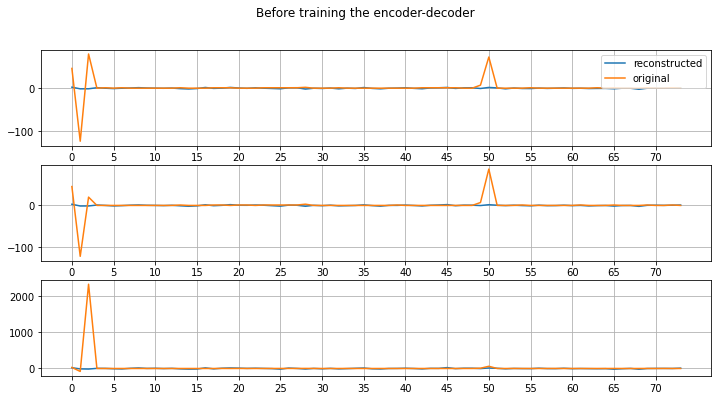

In [45]:
def plot_orig_vs_recon(title='', n_samples=3):
    fig = plt.figure(figsize=(12,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(rest_valid.shape[0]), 1) #randomly choose 3 samples from valid set 结果是[1] 还有一层list！
        plt.plot(autoencoder.predict(rest_valid[idx]).squeeze(), label='reconstructed' if i == 0 else '') #[[1]]索引结果是2d array--因为predict需要是2d的！
        plt.plot(rest_valid[idx].squeeze(), label='original' if i == 0 else '')
#         fig.axes[i].set_xticklabels(metric_names)
        plt.xticks(np.arange(0, rest_valid.shape[1], 5))
        plt.grid(True)
        if i == 0: plt.legend();

# before training:
plot_orig_vs_recon('Before training the encoder-decoder')

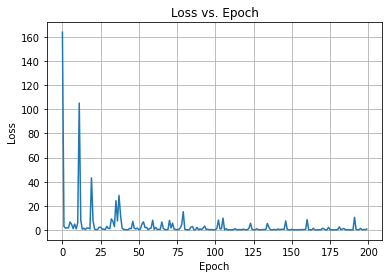

In [70]:
model_history = autoencoder.fit(rest_train,rest_train,epochs=200,
               validation_data=(rest_valid,rest_valid),verbose=0)

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

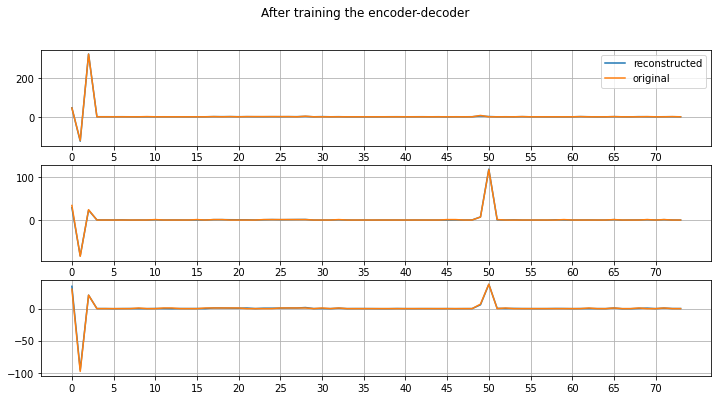

In [47]:
# after training:
plot_orig_vs_recon('After training the encoder-decoder')

# represent three random samples from validation set perfectly

In [71]:
# after dim reduction: latent space/encoding layer
X_encoded = encoder.predict(X)
X_encoded.shape

(12658, 50)

### truncated SVD
- does **not center the data** before computing the singular value decomposition. This means it can work with **sparse matrices efficiently.**

In [50]:
svd = TruncatedSVD(n_components=60, n_iter=7, random_state=42)
svd.fit(X_std)

TruncatedSVD(n_components=60, n_iter=7, random_state=42)

svd Saved


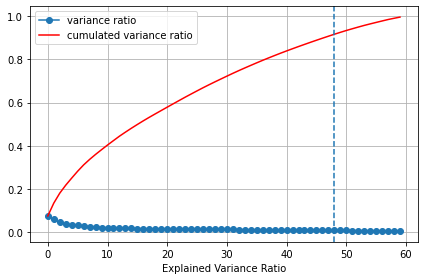

In [51]:
# find out how many PCs needed to achieve 90% of variance
cumsum = np.cumsum(svd.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1

plt.plot(svd.explained_variance_ratio_,"-o",label="variance ratio")
plt.plot(cumsum,"r-",label="cumulated variance ratio")
# plt.xlim(0,50)
plt.xlabel("Principal Component #")
plt.xlabel("Explained Variance Ratio")
plt.axvline(x=d,ymin=0,linestyle="--")
plt.grid(True)
plt.legend()
save_fig("svd")
plt.show()

In [52]:
print(f"Number of PCs to keep in order to maintain 90% variance:{d}")

Number of PCs to keep in order to maintain 90% variance:48


In [53]:
svd = TruncatedSVD(n_components=49, n_iter=7, random_state=42)
X_svd = svd.fit_transform(X_std)

###  Feature hierarchical clustering
- group together features that behave similarly,recursively merges pair of clusters of features
- if features have very different scaling or statistical properties, `cluster.FeatureAgglomeration` may not be able to capture the links between related features. Using a `preprocessing.StandardScaler` can be useful in these settings.

In [59]:
# setting distance_threshold=0 ensures we compute the full tree.
feat_model = FeatureAgglomeration(n_clusters=None,distance_threshold=0,compute_full_tree = True,
                             linkage = "single",compute_distances=True)
X_hierarchy = feat_model.fit_transform(X)


In [60]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Feature Hier Clustering Saved


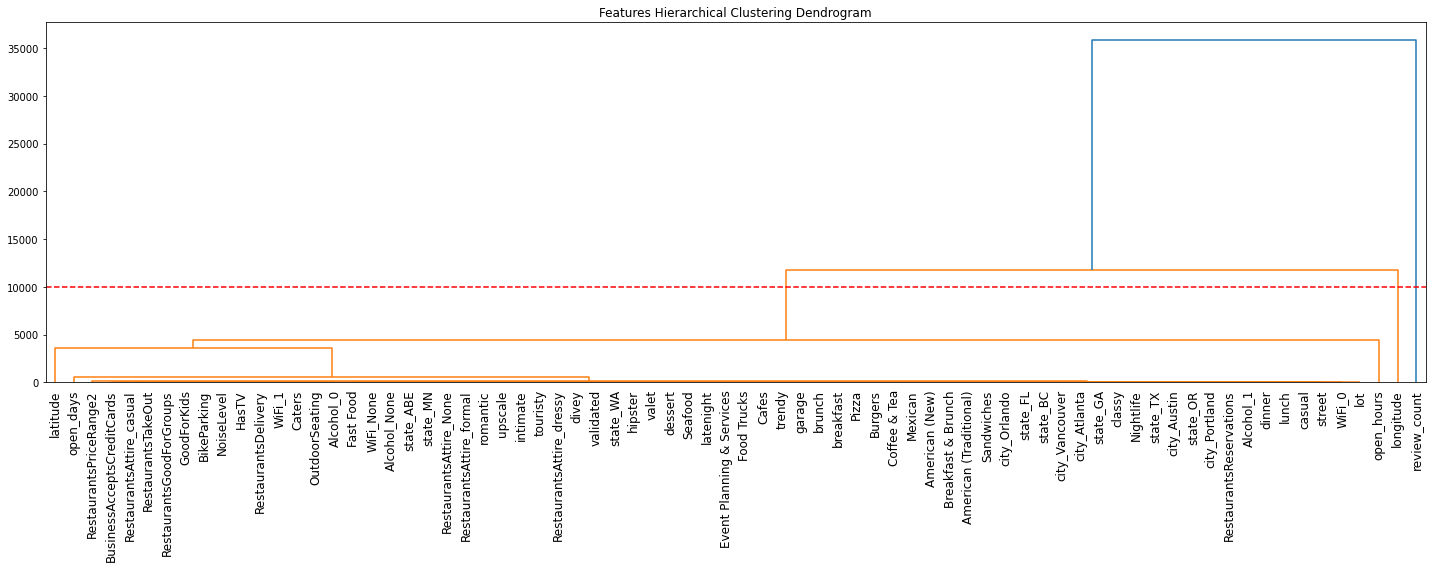

In [64]:
plt.figure(figsize=(20,8))
plt.title("Features Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(feat_model,labels=X.columns,
               leaf_font_size=12)
# plt.ylim(0,2000)
plt.axhline(y=10000, color='r', linestyle='--')
save_fig("Feature Hier Clustering")
plt.show()

# explore children_发现还是city和state最先merge

This line cuts dendrogram at three points therefore 3 clusters
- Retrain `FeatureAgglomeration` hierarchical clustering for 3 clusters

In [65]:
# setting distance_threshold=0 ensures we compute the full tree.
feat_model = FeatureAgglomeration(n_clusters=3,affinity = "cosine",linkage = "average") #since sparse:use cosine as dist metrics
X_hierarchy = feat_model.fit_transform(X)
X_hierarchy.shape

(12658, 3)

### Downstream linear regression model

In [72]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
R2 = list()
names = ["Original Data","PCA","Truncated SVD",
         "Kernel PCA","Isomap","Locally linear embedding","Autoencoder",
         "Hierarchical Clustering"]
candidates = [X,X_pca,X_svd,
              X_kpca,X_iso,X_lle,X_encoded,
              X_hierarchy]
for data in candidates:
    model = linreg.fit(data,y) #y=stars
    R2.append(model.score(data,y))

In [73]:
pd.DataFrame({"Dimension Reduction":names,
             "R Square":R2})

,Dimension Reduction,R Square
0,Original Data,0.382606
1,PCA,0.367030
2,Truncated SVD,0.368191
3,Kernel PCA,0.038785
4,Isomap,0.123224
5,Locally linear embedding,0.067779
6,Autoencoder,0.223650
7,Hierarchical Clustering,0.025085


- PCA and Truncated SVD are the best ones in capturing data information
- use `Truncated SVD` for ultimate dimension reduction

In [25]:
# apply the best dimension reduction algorithm to whole dataset including "stars"
full_std = StandardScaler().fit_transform(rest_final)
best = TruncatedSVD(n_components=48, n_iter=7, random_state=42)
X_red = best.fit_transform(full_std)
np.cumsum(best.explained_variance_ratio_) #still need 48 PCs for 90% variance


array([0.07513282, 0.13443649, 0.17978877, 0.21802348, 0.25276853,
       0.28413174, 0.31289991, 0.33788129, 0.36093787, 0.38244656,
       0.4036164 , 0.42396893, 0.44407981, 0.46251771, 0.48042171,
       0.4975311 , 0.51445449, 0.53050298, 0.54601013, 0.56140897,
       0.57671269, 0.59191509, 0.6070409 , 0.62203954, 0.63658488,
       0.65104705, 0.66526508, 0.67889408, 0.69225016, 0.70538987,
       0.71835483, 0.73117303, 0.74360581, 0.75569869, 0.76749538,
       0.77915124, 0.79056619, 0.80167379, 0.81270478, 0.82337501,
       0.83369941, 0.84379134, 0.85371611, 0.86353334, 0.87315778,
       0.88254317, 0.89183271, 0.90091944])

## Clustering

### Evaluation metrics for clustering methods when ground truth is not known

#### `sklearn.metrics.silhouette_score`
- a higher Silhouette Coefficient score relates to a model with better defined clusters
- Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the **same class**.

b: The mean distance between a sample and all other points in the **next nearest cluster**.

- The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

Advantages:
- The score is bounded between `-1` for incorrect clustering and `+1` for highly dense clustering. Scores around zero indicate overlapping clusters.
- score is higher when clusters are dense and well separated

Drawbacks:
- The Silhouette Coefficient is generally **higher for convex clusters** than other concepts of clusters, such as density based clusters like those obtained through DBSCAN


#### `sklearn.metrics.calinski_harabasz_score`
- AKA:"Variance Ratio Criterion"
- index = ratio of the `sum of between-clusters dispersion` and of `within-cluster dispersion` for all clusters (where dispersion is defined as the `sum of distances squared`)
 
Advantages:
- The score is higher when clusters are dense and well separated
- Fast to compute

Drawbacks:
- generally higher for `convex clusters` than other concepts of clusters, such as density based clusters

#### `sklearn.metrics.davies_bouldin_score`
- `lower` Davies-Bouldin index relates to a model with better separation between the clusters(Zero is the lowest possible score. Values closer to zero indicate a better partition.)
- 代表了 `average similarity` btw clusters(所以越小越好)
    -  `similarity` is a measure that compares the distance between clusters with the size of the clusters themselves
    
Advantages:
- The computation of Davies-Bouldin is **simpler** than that of Silhouette scores
- solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances.

Drawbacks:
- The Davies-Boulding index is generally higher for convex clusters
- P.S convex clusters: if two points are in a cluster then the straight line drawn between them also **lies entirely within that cluster**
- The usage of centroid distance limits the **distance metric to Euclidean space.**


### KMeans

In [26]:
# Elbow method
kmeans_per_k = [KMeans(n_clusters = k,random_state = 42).fit(X_red) for k in range(2,11)]
inertias = [model.inertia_ for model in kmeans_per_k]

Elbow Saved


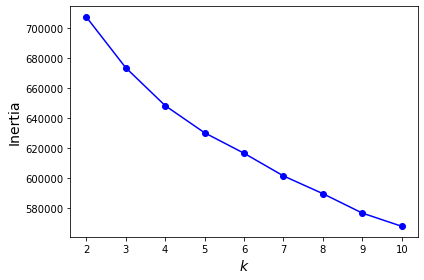

In [27]:
plt.figure(figsize=(6,4))
plt.plot(range(2,11),inertias,"bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
save_fig("Elbow")
plt.show()

In [28]:
# try diff n_cluster:
result = pd.DataFrame()
for k in range(2,11): 
    kmeans = KMeans(n_clusters = k,n_init=15,random_state = 42)
    t0 = time.time()
    kmeans.fit(X_red)
    elapsed = time.time() - t0
    labels = kmeans.labels_
    try:
        score = silhouette_score(X_red,labels,metric='euclidean')
    except ValueError: #when all samples have same label,cannot compute
        score = None
    res = [k,score,elapsed]
    result = result.append([res],ignore_index=True)
result.columns = ["Num_clusters","Silhouette_score","Time"]

In [29]:
result.sort_values(by="Silhouette_score",ascending=False,inplace=True)
result.to_csv("./dataset/kmeans_clustercomp.csv",index=False)
result

# Silhouette_score is generally higher for convex cluster
# And if clusters are convex：kmeans is better 
# But here Silhouette_score is all pretty low: could means clusters are not convex!
# best Kmeans: n_clusters = 2/3

,Num_clusters,Silhouette_score,Time
1,3,0.074823,0.385294
0,2,0.069655,0.295566
3,5,0.066400,0.677786
5,7,0.064097,0.764064
7,9,0.061925,0.720688
8,10,0.061431,0.795759
2,4,0.060476,0.547538
4,6,0.060338,0.819850
6,8,0.057559,0.703362


### hierarchical clustering
- try to add connectivity constraint: only adjacent clusters can be merged together
    - impose a certain local structure

In [119]:
# try add connectivity or not
# try diff cluster number
# try diff linkage methods
knn_graph = kneighbors_graph(X_red, 30, include_self=False)
conn = {"No":None,"Yes":knn_graph}
result = pd.DataFrame()

for k in conn: #loop over keys
    connectivity = conn[k]
    for n in range(2,7): #2-6 clusters
        for link in ["average", "complete", "ward", "single"]: #40 models
            model = AgglomerativeClustering(
                linkage=link, connectivity=connectivity, n_clusters=n)
            t0 = time.time()
            model.fit(X_red)
            elapsed = time.time() - t0
            labels = model.labels_
            scores = silhouette_score(X_red,labels,metric='euclidean')
            res = [k,n,link,scores,elapsed]
            result = result.append([res],ignore_index = True)
result.columns = ["Connectivity","Num Cluster","Linkage","Silhouette_score","Time"]

In [120]:
result.sort_values(by="Silhouette_score",ascending=False,inplace=True)

result[:3] # first three rows have same silhouette_score

,Connectivity,Num Cluster,Linkage,Silhouette_score,Time
0,No,2,average,0.902822,8.506646
21,Yes,2,complete,0.902822,10.839146
20,Yes,2,average,0.902822,11.662817


In [123]:
str(model).split("(")

['AgglomerativeClustering',
 "connectivity=<12658x12658 sparse matrix of type '<class 'numpy.float64'>'\n\twith 379740 stored elements in Compressed Sparse Row format>,\n                        linkage='single', n_clusters=6)"]

### DBSCAN

In [115]:
# Hyperparameter tuning: try diff eps & min_samples param:
result = pd.DataFrame()

# eps & min_samples candidate values: try diff values for many times ITERATIVE!
for eps in [15,20,24,30]: 
    for min_samples in range(2,7): #3-7
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        t0 = time.time()
        dbscan.fit(X_red)
        elapsed = time.time() - t0
        labels = dbscan.labels_
        try:
            score = silhouette_score(X_red,labels,metric='euclidean')
        except ValueError: #when all samples have same label,cannot compute
            score = None
        res = [eps,min_samples,score,elapsed,pd.Series(labels).nunique()]
        result = result.append([res],ignore_index=True)
result.columns = ["Eps","Min_samples","Silhouette_score","Time","Num_clusters"]

In [116]:
result.sort_values(by = "Silhouette_score",ascending=False) #after调eps metric much better!
# best DBSCAN:
# eps=20,min_samples:5

,Eps,Min_samples,Silhouette_score,Time,Num_clusters
8,20,5,0.716593,2.542407,3
9,20,6,0.716593,2.934480,3
10,24,2,0.715579,2.597230,5
11,24,3,0.715579,2.538802,5
17,30,4,0.715579,2.765232,5
16,30,3,0.715579,2.519677,5
15,30,2,0.715579,2.557729,5
12,24,4,0.715579,2.769178,5
18,30,5,0.715297,2.547201,4
14,24,6,0.715297,2.630077,4


### Combine all 3 clustering methods

In [31]:
hier_model = AgglomerativeClustering(n_clusters = 2,linkage="average", connectivity=None)
kmeans = KMeans(n_clusters = 2,n_init = 20,random_state=42)
dbscan = DBSCAN(eps=20,min_samples=5)

candidates = [("KMeans",kmeans),
             ("Agglomerative Clustering",hier_model),
             ("DBSCAN", dbscan)]
result = pd.DataFrame()
for name,clustering in candidates:
    print(f"Computing {name}...")
    start_time = time.time()
    # fit data
    model = clustering.fit(X_red)
    # predict clustering labels
    labels = model.labels_
    # number of clusters
    num_clusters = pd.Series(labels).nunique()
    # 3 metrics
    sil_score = silhouette_score(X_red,labels,metric='euclidean')
    ch_score = calinski_harabasz_score(X_red, labels)
    db_score = davies_bouldin_score(X_red, labels)
    # time to fit & calculate scores
    elapsed = time.time() - start_time
    
    # save result
    res = [name,num_clusters,sil_score,ch_score,db_score,elapsed]
    result = result.append([res],ignore_index = True)
    
result.columns = ["Clustering","Number_clusters","Silhouette_score",
                  "Calinski_harabasz","Davies_bouldin","Timing"]

Computing KMeans...
Computing Agglomerative Clustering...
Computing DBSCAN...


In [32]:
result

,Clustering,Number_clusters,Silhouette_score,Calinski_harabasz,Davies_bouldin,Timing
0,KMeans,2,0.069655,807.495089,3.600744,2.202317
1,Agglomerative Clustering,2,0.908976,217.184337,0.063518,9.684079
2,DBSCAN,4,0.733612,230.663278,1.019296,4.321405


- Agglomerative Clustering is very high in Silhouette_score and low in Davies_bouldin(good),but very low in Calinski_harabasz(KMeans is higher in this metrics)
- plot all 3 clustering result

## Plot Clustering Result

In [33]:
final = pd.DataFrame(X_red)

final["km_labels"] = kmeans.labels_
rest_final["km_labels"] = kmeans.labels_

final["hier_labels"] = hier_model.labels_
final["dbscan_labels"] = dbscan.labels_

# Problem:hierarchical,dbscan very uneven!

In [34]:
bus_kmeans = business_info.copy()
bus_kmeans["kmeans_label"] = kmeans.labels_

In [35]:
pd.crosstab(index=bus_kmeans["kmeans_label"],columns=bus_kmeans["city"])

city,Atlanta,Austin,Orlando,Portland,Vancouver
kmeans_label,,,,,
0,2263,2608,2264,0,0
1,0,0,0,2848,2675


In [70]:
rest_final.groupby("km_labels").mean()

,latitude,longitude,stars,review_count,American (New),American (Traditional),Breakfast & Brunch,Burgers,Cafes,Coffee & Tea,Event Planning & Services,Fast Food,Food Trucks,Mexican,Nightlife,Pizza,Sandwiches,Seafood,RestaurantsTakeOut,GoodForKids,BikeParking,OutdoorSeating,Caters,RestaurantsReservations,RestaurantsDelivery,HasTV,RestaurantsGoodForGroups,BusinessAcceptsCreditCards,NoiseLevel,RestaurantsPriceRange2,WiFi,Alcohol,garage,street,validated,lot,valet,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,casual,dessert,latenight,lunch,dinner,brunch,breakfast,open_days,open_hours,city_Atlanta,city_Austin,city_Orlando,city_Portland,city_Vancouver,state_ABE,state_MN,state_WA,RestaurantsAttire_None,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal
km_labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,30.831419,-88.320560,3.610512,194.568465,0.135809,0.155992,0.132165,0.111142,0.053959,0.085494,0.075964,0.151367,0.061528,0.123196,0.203504,0.088157,0.153469,0.075543,0.910161,0.878907,0.798038,0.592151,0.675403,0.266854,0.692081,0.760477,0.905957,0.990049,0.996496,1.654240,0.688718,0.463910,0.106237,0.219201,0.035039,0.666854,0.076524,0.016678,0.014436,0.025228,0.035879,0.022425,0.218080,0.086475,0.020883,0.497267,0.060266,0.062509,0.430554,0.400561,0.076945,0.093623,6.59958,64.222801,0.317169,0.365522,0.317309,0.000000,0.000000,0.000000,0.00014,0.00000,0.000561,0.977856,0.020603,0.000981
1,47.027207,-122.831589,3.731577,141.905486,0.077675,0.104834,0.131269,0.080572,0.081840,0.121130,0.050878,0.097411,0.071157,0.085823,0.205866,0.086004,0.129640,0.042911,0.931016,0.844469,0.910013,0.566540,0.585370,0.294767,0.632265,0.696542,0.856962,0.984610,0.963969,1.676444,0.661235,0.494478,0.043455,0.590621,0.007967,0.378780,0.014304,0.009053,0.016839,0.005070,0.041282,0.022995,0.201159,0.058845,0.007786,0.509144,0.033677,0.060474,0.375702,0.361579,0.077313,0.082383,6.50860,60.594879,0.000000,0.000000,0.000000,0.515662,0.484338,0.000181,0.00000,0.08528,0.000181,0.987507,0.011769,0.000543


In [71]:
final["hier_labels"].value_counts() #all data except for one are grouped into one cluster

0    12657
1        1
Name: hier_labels, dtype: int64

comparison Saved


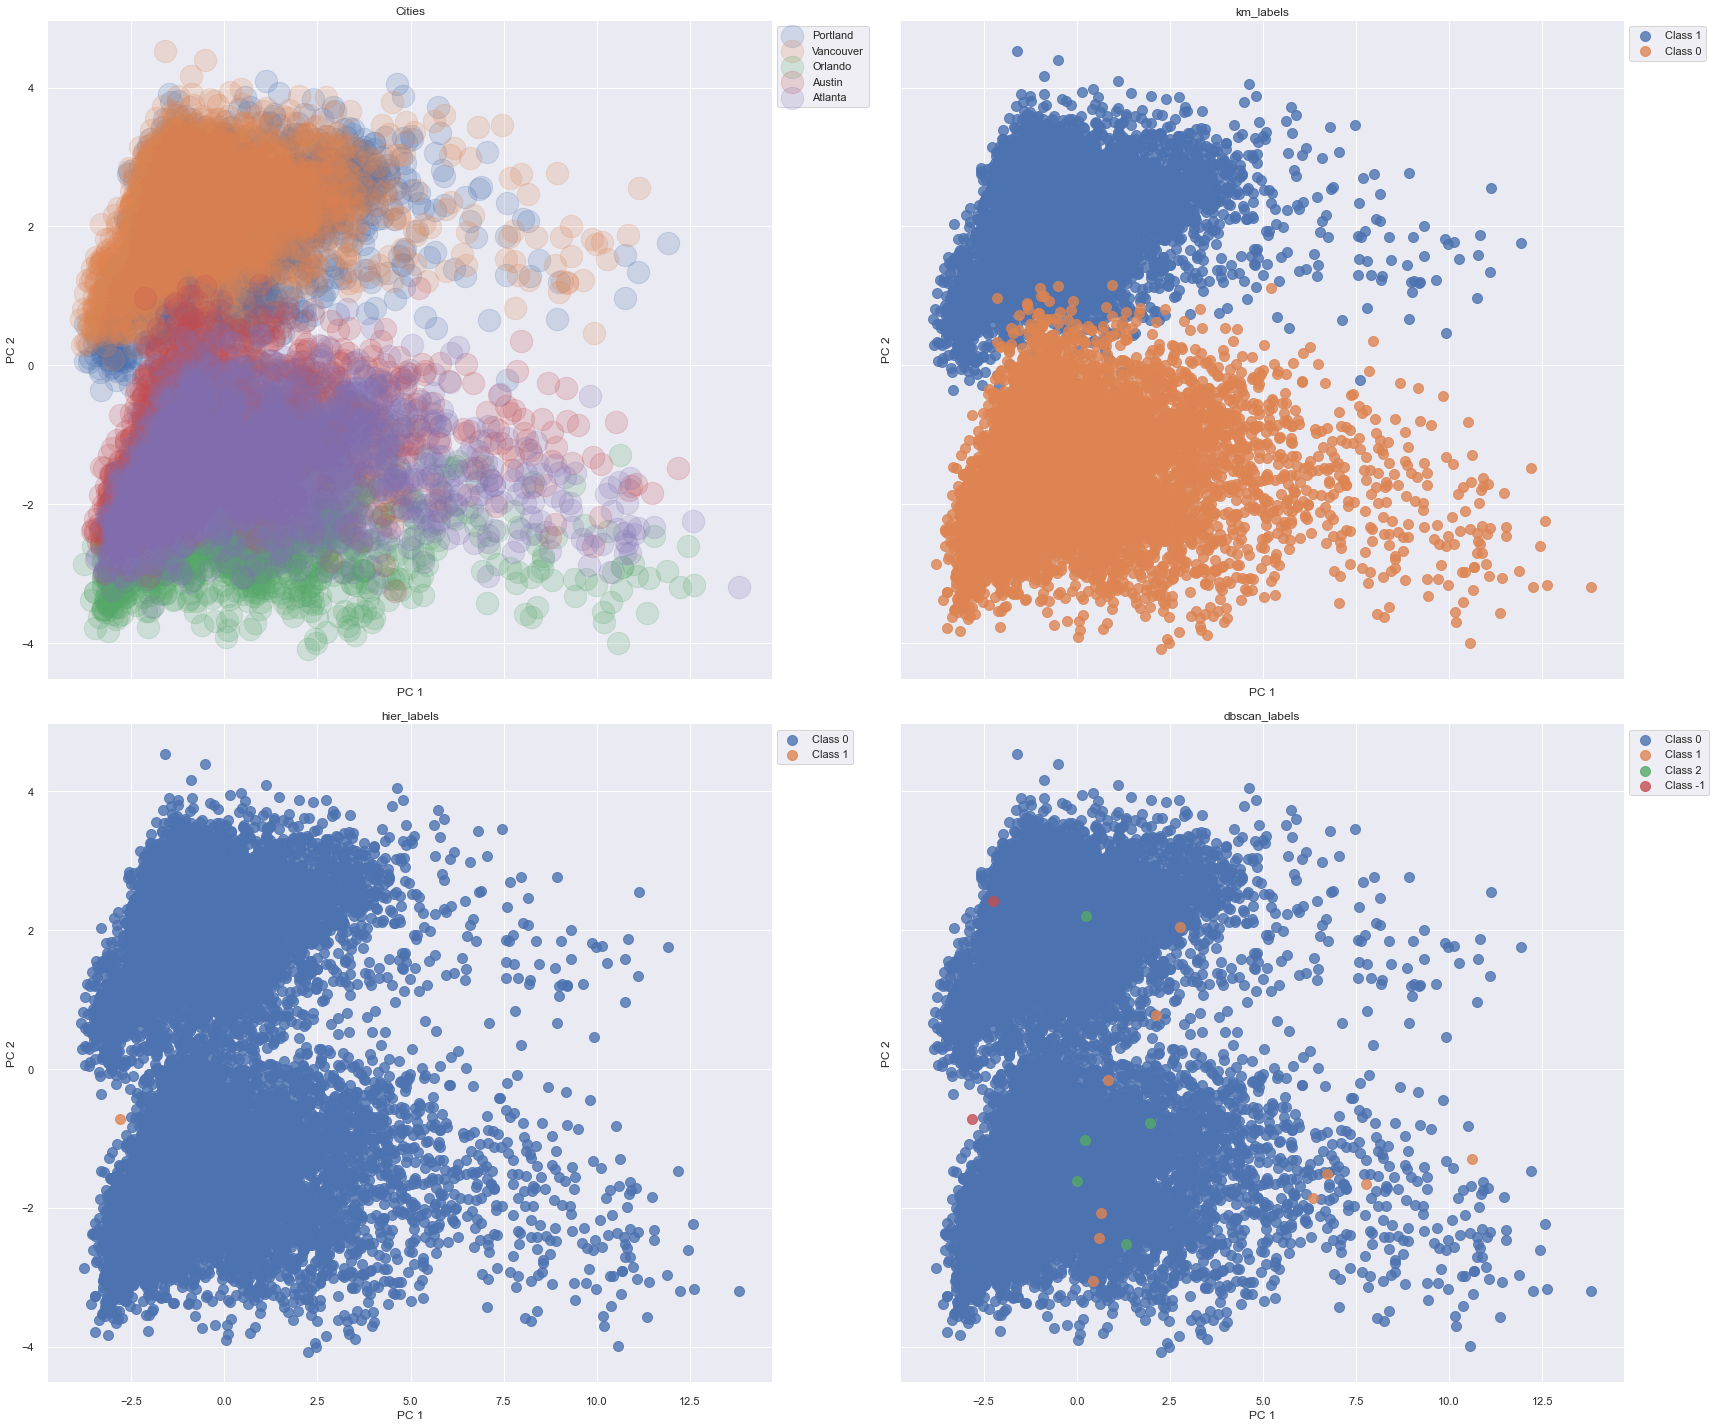

In [73]:
# Make plot
fig, ((ax10,ax11),(ax20,ax21)) = plt.subplots(2,2,figsize=(24, 20),sharex=True,sharey=True)

# Plot 5 known cities--bigger and more transparent circle
for c in cities:
    tmp = final[business_info["city"] == c]
    ax10.scatter(tmp.iloc[:,0],tmp.iloc[:,1],label = c, alpha=0.2, s=500)
ax10.set_xlabel('PC 1')
ax10.set_ylabel('PC 2')
ax10.set_title("Cities")
ax10.legend(bbox_to_anchor=(1, 1), loc=2)    

# Plot cluster labels--smaller and more solid
for axi,label in zip([ax11,ax20,ax21],
                     ["km_labels","hier_labels","dbscan_labels"]):
    clabels = final[label].unique().tolist() #list of unique labels [-1,0,1]

    for idx in clabels: 
        tmp = final[final[label] == idx] #specific clustering label column + rows corresp to idx 
        axi.scatter(tmp.iloc[:,0],tmp.iloc[:,1],label = f"Class {idx}", alpha=0.8, s=100)

    axi.set_xlabel('PC 1')
    axi.set_ylabel('PC 2')
    axi.set_title(label)
    axi.legend(bbox_to_anchor=(1, 1), loc=2)

    sns.despine(offset=5, trim=True)
    sns.set(font_scale=1.0)
save_fig("comparison")
plt.show()

KMeans_6 Saved


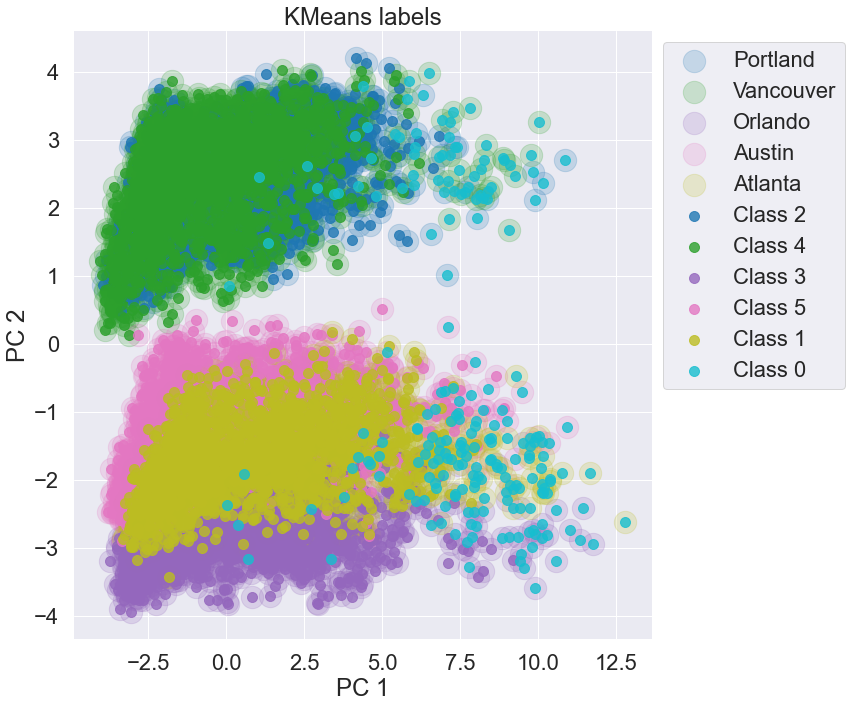

In [108]:
# KMeans--# cluster=6
# Make plot
colors = plt.cm.tab10(np.linspace(0, 1, 6))
sns.set(font_scale=2.0)
fig, ax = plt.subplots(figsize=(12, 10))

# Plot 5 known cities--bigger and more transparent circle
for i,c in enumerate(cities):
    tmp = final[business_info["city"] == c]
    ax.scatter(tmp.iloc[:,0],tmp.iloc[:,1],label = c,color=colors[i],alpha=0.2, s=500,cmap="Paired")

# Plot cluster labels--smaller and more solid
clabels = final["km_labels"].unique().tolist() #list of unique labels [-1,0,1]

for i,idx in enumerate(clabels): 
    tmp = final[final["km_labels"] == idx]
    ax.scatter(tmp.iloc[:,0],tmp.iloc[:,1],label = f"Class {idx}", color=colors[i],alpha=0.8, s=100,cmap="Pastel1")

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title("KMeans labels")
ax.legend(bbox_to_anchor=(1, 1), loc=2)

sns.despine(offset=5, trim=True)
sns.set(font_scale=1.0)

save_fig("KMeans_6")
plt.show()